# REAL-TIME FINGER COUNTING PROJECT USING HANDTRACKING MODULE

In [ ]:
import cv2                    
import time
import os
import HandTrackingModule as htm


wCam, hCam = 640, 480                    #width and height of the camera
cap = cv2.VideoCapture(0)                # Turning ON the camera(0 is device number)
cap.set(3, wCam)                         # width=640, id=3 for width
cap.set(4, hCam)                         # height=480, id=4 for height

folderpath="FingerImages"                # folder name where finger images are stored
mylist=os.listdir(folderpath)            # Get the list of all files  in Fingerimage folder
print(mylist)
overlaylist=[]                           #creating list of images
for impath in mylist:                    # here impath is 1.jpeg,2jpeg,etc 
    image=cv2.imread(f'{folderpath}/{impath}')   #reading image from FingerImage @ image-path(1.jpeg,2.jpeg,etc)
    #print(f'{folderpath}/{impath}')
    overlaylist.append(image)                   #saving images in overlaylist
print(len(overlaylist) )    
pTime=0                               #previous time, initializing it as 0                   
detector = htm.handDetector(detectionCon=0.75)  #creating detector; accessing it from HTM 
tipIds = [4,8,12,16,20]                #tip ID of finger of right hand

while True:
    success, img = cap.read()            #this will read our frame     
    img = detector.findHands(img)        #this will draw our hand
    lmList= detector.findPosition(img, draw=False)   #lmlist contains list of landmark of hand
    #print(lmList)
    if len(lmList) !=0:
        fingers = []        #this list will contain the status of 5 finger;1-if open & 0-if closed
        # Thumb
        if lmList[tipIds[0]][1] > lmList[tipIds[0] - 1][1]:   #checking wheather the finger is open or close
            fingers.append(1)
        else:
            fingers.append(0)
        # 4 Fingers
        for id in range(1,5):
            if lmList[tipIds[id]][2] < lmList[tipIds[id] - 2][2]:  #[2]is for y-axis; condition for finger is open
                fingers.append(1)
            else:
                fingers.append(0)
                
        #print(fingers)
        totalFingers = fingers.count(1)    # contains total no of finges open on camera
        #print(totalFingers)
        
        h , w ,c = overlaylist[totalFingers-1].shape  #c:channel, storing size of images in variables h,w
        img[0:h, 0:w]= overlaylist[totalFingers-1]     #(0,0)-location of image"Top left corner"; (h,w):height and width of image     
        cv2.rectangle(img, (20, 225), (170, 425),(255,20,0),cv2.FILLED)      #for showing count in green coloured box
        cv2.putText(img, str(totalFingers),(45,375), cv2.FONT_HERSHEY_PLAIN,
                    10,(0,255,0),25)        #scale=10,thickness=25, colour=blue
    cTime=time.time()               #ctime=current time
    fps=1/(cTime-pTime)            # calculating FPS 
    pTime=cTime                    #updating it for every loop
    cv2.putText(img, f'FPS:{int(fps)}',(400,70),cv2.FONT_HERSHEY_PLAIN,3,(255,0,0),3)  #scale =3 and thickness=3
    cv2.imshow("Image",img)          #open cv command to show image
    cv2.waitKey(1)                   #gives 1msec delay


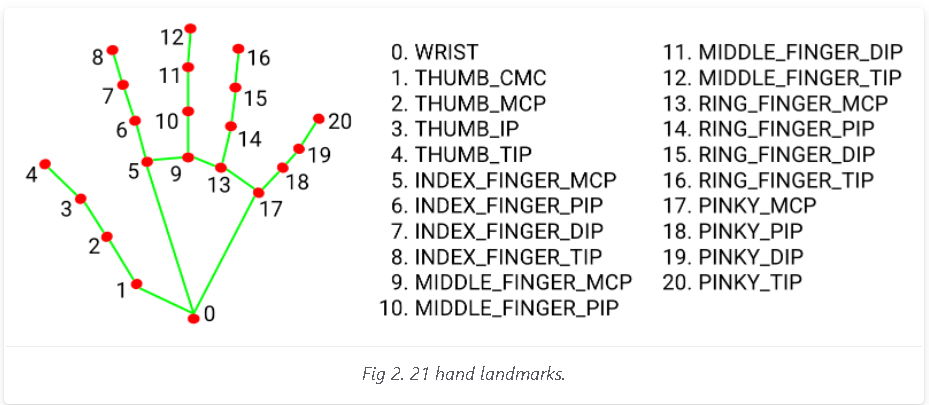